In [ ]:
print("hello")

hello


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df=pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#shape of dataset
print("Dataset Shape:",df.shape)

#data types and null values
print("\nInfo:")
df.info()

#Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Dataset Shape: (569, 33)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64


Diagnosis value counts:
diagnosis
B    357
M    212
Name: count, dtype: int64


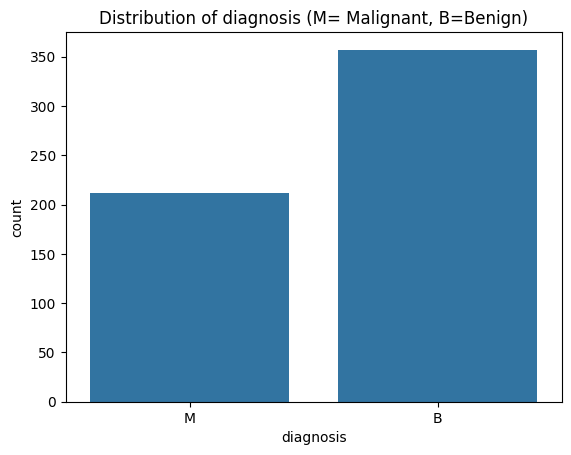

In [ ]:
#check distribution of target 
print("\nDiagnosis value counts:")
print(df['diagnosis'].value_counts())

#plot the target distribution
sns.countplot(x='diagnosis', data=df)
plt.title("Distribution of diagnosis (M= Malignant, B=Benign)")
plt.show()


In [ ]:
#drop 'id' and unnamed column
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)

#confirm shape after dropping
print("Updated dataset shape:", df.shape)

Updated dataset shape: (569, 31)


In [ ]:
#convert diagnosis column to binary
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [ ]:
#features and labels
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split

#split data (80% train, 20% test)
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

print("Training samples: ", x_train.shape[0])
print("Testing samples: ", x_test.shape[0])

Training samples:  455
Testing samples:  114


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

#fit only on training data
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#create the model
model=RandomForestClassifier(n_estimators=100, random_state=42)

#train the model
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
#predict labels for test set
y_pred=model.predict(x_test)

In [ ]:
#compare actual vs predicted(first 10 examples)
print("Actual: ",y_test[:10])
print("Predicted: ", y_pred[:10])

Actual:  204    0
70     1
131    1
431    0
540    0
567    1
369    1
29     1
81     0
477    0
Name: diagnosis, dtype: int64
Predicted:  [0 1 1 0 0 1 1 1 1 0]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#check accuracy
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.96


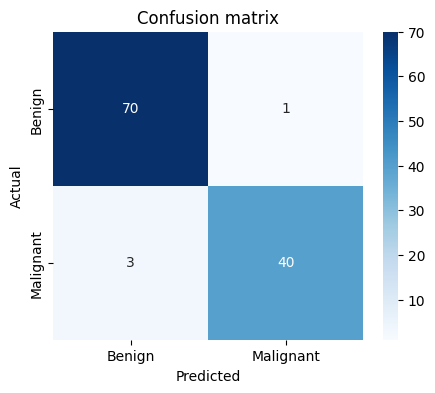

In [ ]:
#generate the confusion matrix
cm=confusion_matrix(y_test,y_pred)

#plot it
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign','Malignant'], yticklabels=['Benign','Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()


In [ ]:
#detailed metrics: precision, recall, f1-score
print("Classification Report:\n")
print(classification_report(y_test,y_pred, target_names=['Benign', 'Malignant']))

Classification Report:

              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        71
   Malignant       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



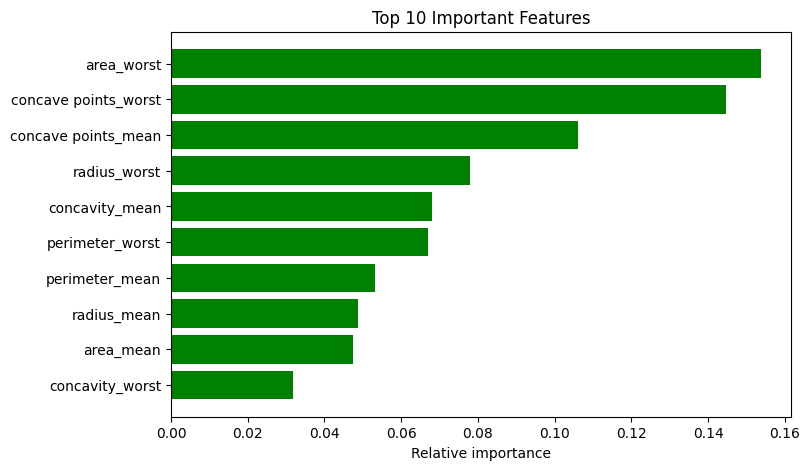

In [ ]:
#plot top 10 important features
importances=model.feature_importances_
features=x.columns

#sort
indices=np.argsort(importances)[-10:]
plt.figure(figsize=(8,5))
plt.title("Top 10 Important Features")
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [ ]:
#Dictionary to store models and results
models={ "Random Forest": RandomForestClassifier(n_estimators=100,random_state=42),"Logistic Regression": LogisticRegression(max_iter=10000), "SVM": SVC(kernel='linear')}

#store accuracy scores 
results={}

for name, clf in models.items():
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results[name]=acc
    print(f"{name} Accuracy: {acc:.4f}")
    

Random Forest Accuracy: 0.9649
Logistic Regression Accuracy: 0.9737
SVM Accuracy: 0.9561


C:\Users\CHRYSL SHECKINA\AppData\Local\Temp\ipykernel_3968\505115415.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='coolwarm')


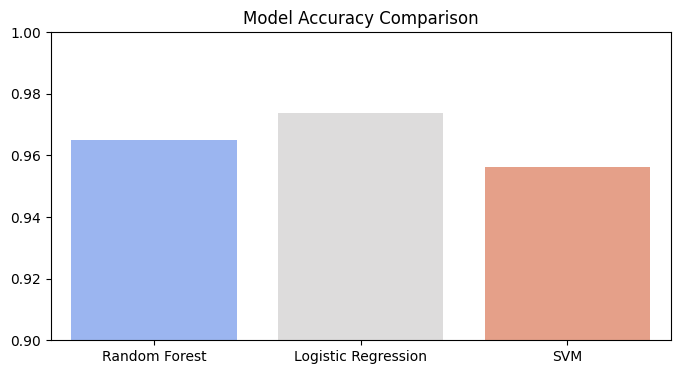

In [ ]:
#Bar chart for comparison
plt.figure(figsize=(8,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='coolwarm')
plt.title("Model Accuracy Comparison")
plt.ylim(0.9,1.0)
plt.show()


In [ ]:
for name,clf in models.items():
    print(f"\n{name} Classification Report:")
    y_pred=clf.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))
    


Random Forest Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        71
   Malignant       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Logistic Regression Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        71
   Malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


SVM Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.96      0.96        71
   Malignant       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg      

In [ ]:
from sklearn.metrics import roc_curve,auc, RocCurveDisplay

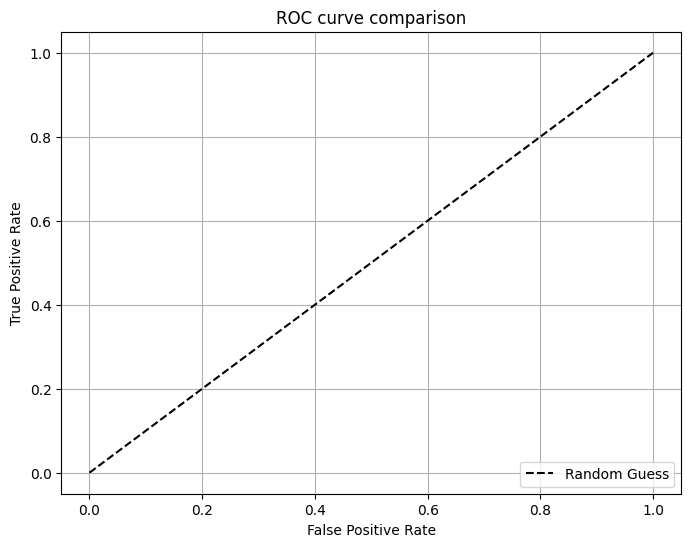

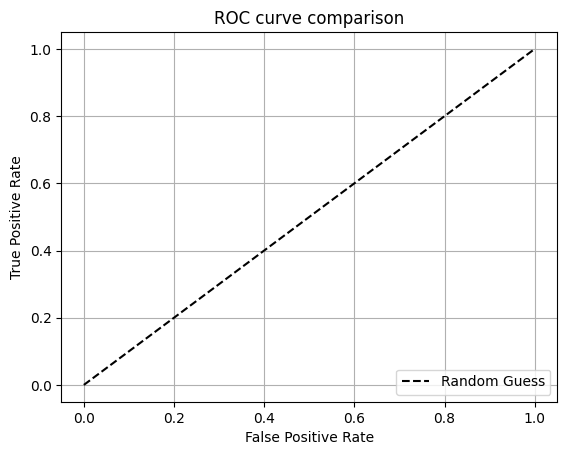

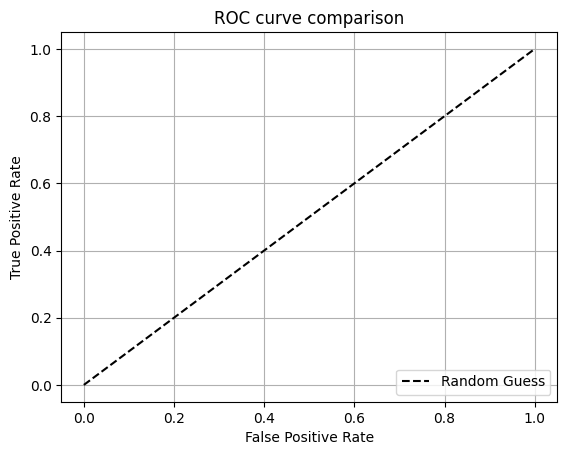

In [ ]:
#create a plot
plt.figure(figsize=(8,6))

for name, clf in models.items():
    if hasattr(clf, "predict_proba"):
        y_probs=clf.predict_proba(x_test)[:,1]
    else: 
        y_probs = clf.decision_function(x_test)

    #calculate roc curve
    fpr,tpr,_=roc_curve(y_test,y_probs)
    roc_auc=auc(fpr,tpr)

    #plot diagonal line for reference
    plt.plot([0,1],[0,1],'k--', label="Random Guess")

    #labels and legends
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve comparison")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    

In [ ]:
print("AUC Scores:")
for name, clf in models.items():
    if hasattr(clf, "predict_proba"):
        y_probs=clf.predict_proba(x_test)[:,1]
    else: 
        y_probs=clf.decision_function(x_test)

    fpr, tpr, _=roc_curve(y_test, y_probs)
    roc_auc =auc(fpr,tpr)
    print(f"{name}:AUC={roc_auc:.4f}")
    

AUC Scores:
Random Forest:AUC=0.9953
Logistic Regression:AUC=0.9974
SVM:AUC=0.9964
